In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

In [3]:
ldf = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col=None)

In [4]:
ldf.iloc[:4,:8]

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131


In [5]:
# rename 'Borough Code' header
ldf.loc[0,'Unnamed: 0'] = 'Borough Code'

# drop unnessessary columns past the actual London Boroughs
ldf_rev1 = ldf.drop(ldf.columns[34:], axis=1)

# drop 'City of London' since it is technically not a borough
ldf_rev2 = ldf_rev1.drop('City of London', axis=1)

# rename the date column
ldf_rev3 = ldf_rev2.rename({'Unnamed: 0': 'Date'}, axis=1)

ldf_rev3.iloc[:4,:8]

,Date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon
0,Borough Code,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008
1,1995-01-01 00:00:00,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225
2,1995-02-01 00:00:00,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542
3,1995-03-01 00:00:00,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341


### --------------------- branch to Alternate Method --------------------------


## Primary (relative) Method

In [6]:
# set index before transpose
ldf_ind = ldf_rev3.set_index('Date')
ldf_ind.iloc[:4,:8]

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing
Date,,,,,,,,
Borough Code,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009
1995-01-01 00:00:00,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069
1995-02-01 00:00:00,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551
1995-03-01 00:00:00,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288


In [7]:
# transpose dataframe
ldf_trp = ldf_ind.transpose()
ldf_trp.iloc[:4,:8]

Date,Borough Code,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055
Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788


In [8]:
# reset index
ldf_ind_reset = ldf_trp.reset_index()

# rename the borough column 'index' to 'Borough'
ldf_ind_rename = ldf_ind_reset.rename(columns={'index':'Borough'})
ldf_ind_rename.iloc[:4,:8]

Date,Borough,Borough Code,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00
0,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831
1,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471
2,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335
3,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167


In [9]:
# melt dataframe into tall, readable format
ldf_melt = ldf_ind_rename.melt(
    id_vars=['Borough', 'Borough Code'], 
    var_name='Date', 
    value_name='Avg Price')
ldf_melt.head(5)

,Borough,Borough Code,Date,Avg Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.2266
1,Barnet,E09000003,1995-01-01,93284.51832
2,Bexley,E09000004,1995-01-01,64958.09036
3,Brent,E09000005,1995-01-01,71306.56698
4,Bromley,E09000006,1995-01-01,81671.47692


In [10]:
# add 'Year' column
ldf_melt['Year'] = ldf_melt['Date'].dt.year
ldf_melt.head()

,Borough,Borough Code,Date,Avg Price,Year
0,Barking & Dagenham,E09000002,1995-01-01,50460.2266,1995
1,Barnet,E09000003,1995-01-01,93284.51832,1995
2,Bexley,E09000004,1995-01-01,64958.09036,1995
3,Brent,E09000005,1995-01-01,71306.56698,1995
4,Bromley,E09000006,1995-01-01,81671.47692,1995


In [11]:
# limit the frequency to years, and get the average for each year
ldf_grp = ldf_melt.groupby(['Borough','Borough Code','Year'], as_index=False)['Avg Price'].mean()
ldf_grp.head()

,Borough,Borough Code,Year,Avg Price
0,Barking & Dagenham,E09000002,1995,51817.969390
1,Barking & Dagenham,E09000002,1996,51718.192690
2,Barking & Dagenham,E09000002,1997,55974.262309
3,Barking & Dagenham,E09000002,1998,60285.821083
4,Barking & Dagenham,E09000002,1999,65320.934441


In [12]:
# round the values in the 'Avg Price' column
ldf_grp['Avg Price'] = ldf_grp['Avg Price'].astype(float).round(2)
ldf_grp.head()

,Borough,Borough Code,Year,Avg Price
0,Barking & Dagenham,E09000002,1995,51817.97
1,Barking & Dagenham,E09000002,1996,51718.19
2,Barking & Dagenham,E09000002,1997,55974.26
3,Barking & Dagenham,E09000002,1998,60285.82
4,Barking & Dagenham,E09000002,1999,65320.93


In [13]:
# create list of boroughs, without duplicates
boroughs = []

for b in ldf_grp['Borough']:
    if b not in boroughs:
        boroughs.append(b)
        
boroughs[:5]

['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley']

In [14]:
# define function to create a ratio of 2023 prices compared to 2003 prices
def price_ratio(borough):
    price_2003 = float(ldf_grp[(ldf_grp['Year'] == 2003) & (ldf_grp['Borough'] == borough)]['Avg Price'])
    price_diff_23_03 = float(ldf_grp[(ldf_grp['Year'] == 2023) & (ldf_grp['Borough'] == borough)]['Avg Price'] - price_2003)
    ratio = price_diff_23_03/price_2003
    return ratio

In [15]:
# create list of price ratios
borough_price_ratios = [price_ratio(b) for b in boroughs]
borough_price_ratios[:5]

[1.4395884937521988,
 1.353950292287901,
 1.4209862061535714,
 1.4806143839200199,
 1.335948711664088]

In [16]:
# turn price ratios into percents
borough_price_percent = [f'{b:,.1%}' for b in borough_price_ratios]
borough_price_percent[:5]

['144.0%', '135.4%', '142.1%', '148.1%', '133.6%']

In [17]:
# create new dataframe from the list of boroughs and price percent values
ldf_borough_price_ratios = pd.DataFrame({'Borough':boroughs,'Price Increase':borough_price_percent})
ldf_borough_price_ratios.sort_values('Price Increase', ascending=False).head()

,Borough,Price Increase
10,Hackney,214.4%
18,Kensington & Chelsea,192.6%
29,Waltham Forest,188.4%
31,Westminster,175.9%
12,Haringey,174.7%


**Final Thoughts:**

Based on the above filtered data, comparing home prices in 2023 to those in 2003, it appears the borough 'Hackney' experienced the largest **relative** price increase over the last two decades.

***

## Alternate (absolute) Method

In [18]:
# create alternate copy of the dataframe
ldf_alt = ldf_rev3

In [19]:
ldf_alt.iloc[:4,:8]

,Date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon
0,Borough Code,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008
1,1995-01-01 00:00:00,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225
2,1995-02-01 00:00:00,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542
3,1995-03-01 00:00:00,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341


In [20]:
# drop 'Borough Code' row
ldf_drp = ldf_alt.drop(0)
ldf_drp.iloc[:4,:8]

,Date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon
1,1995-01-01 00:00:00,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225
2,1995-02-01 00:00:00,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542
3,1995-03-01 00:00:00,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341
4,1995-04-01 00:00:00,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641


In [21]:
# change the datatype of the Date column from timestamp to datetime
ldf_drp['Date'] = pd.to_datetime(ldf_drp['Date'])
ldf_drp.iloc[:4,:8]

,Date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon
1,1995-01-01,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225
2,1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542
3,1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341
4,1995-04-01,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641


In [22]:
# create 'year' column
ldf_drp['year'] = ldf_drp['Date'].dt.year
ldf_drp.iloc[:4,:8]

,Date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon
1,1995-01-01,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225
2,1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542
3,1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341
4,1995-04-01,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641


In [23]:
# group by year and get the average home price per year for each borough
ldf_grp2 = ldf_drp.groupby('year').mean()

# drop the 'Date' column
ldf_grp2 = ldf_grp2.drop('Date', axis=1)
ldf_grp2 = ldf_grp2.round(2)
ldf_grp2.iloc[:4,:8]

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing
year,,,,,,,,
1995,51817.97,91792.54,64291.53,73029.84,81967.32,120367.43,68923.34,81218.67
1996,51718.19,94000.45,65490.42,75235.92,83547.48,133810.49,69713.92,83389.91
1997,55974.26,106883.19,70789.41,86749.07,94224.69,150142.90,77674.27,97805.82
1998,60285.82,122359.47,80632.02,100692.59,108286.52,170688.97,88143.23,111343.15


In [24]:
# create series of the price difference of 2023 and 2003 housing prices and assign name
diff_2023_2003 = ldf_grp2.loc[2023] - ldf_grp2.loc[2003]
diff_2023_2003.name = 'diff_23_03'
diff_2023_2003[:5]

Barking & Dagenham    205139.82
Barnet                340129.82
Bexley                233726.71
Brent                 320555.62
Bromley               288555.53
Name: diff_23_03, dtype: float64

In [25]:
# sort values based on avg price
diff_sort = diff_2023_2003.sort_values(ascending=False)
diff_sort.head()

Kensington & Chelsea    887115.00
Westminster             639495.09
Camden                  534173.77
Hammersmith & Fulham    461970.19
Richmond upon Thames    460849.89
Name: diff_23_03, dtype: float64

**Final Thoughts:**

Based on the above data, looking strictly at the difference in dollar amount by which each borough rose, it appears the borough 'Kensington & Chelsea' experienced the largest **absolute** gain from 2003 to 2023.

Although the above conclusion may be accurate from an absolute perspective, I prefer the relative approach using a percentage increase to answer the initial question.

***

The following prepares a graphical representation of how the price has changed over the past two decades for the top 5 boroughs...

In [26]:
# convert series to dataframe and transpose
diff_23_03_df = pd.DataFrame(diff_2023_2003).T

In [27]:
# add new df as row at the top of the original df
ldf_con_diff = pd.concat([diff_23_03_df, ldf_grp2])
ldf_con_diff.iloc[:4,:8]

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing
diff_23_03,205139.82,340129.82,233726.71,320555.62,288555.53,534173.77,231203.09,310763.08
1995,51817.97,91792.54,64291.53,73029.84,81967.32,120367.43,68923.34,81218.67
1996,51718.19,94000.45,65490.42,75235.92,83547.48,133810.49,69713.92,83389.91
1997,55974.26,106883.19,70789.41,86749.07,94224.69,150142.90,77674.27,97805.82


In [28]:
# sort df by column by the average price difference (row diff_23_03)
ldf_sort = ldf_con_diff.sort_values('diff_23_03', ascending=False, axis=1)
ldf_sort.iloc[:5,:5]

,Kensington & Chelsea,Westminster,Camden,Hammersmith & Fulham,Richmond upon Thames
diff_23_03,887115.00,639495.09,534173.77,461970.19,460849.89
1995,192857.26,133689.23,120367.43,123238.00,109892.27
1996,207156.69,139188.76,133810.49,132045.19,117307.88
1997,246655.60,165447.59,150142.90,151723.24,136656.27
1998,268350.12,190531.95,170688.97,175340.92,162956.07


In [29]:
# create a subset of the 5 boroughs with the highest average increase, from 2003 to 2023
ldf_sub = ldf_sort.loc[2003:].iloc[:,:5]
ldf_sub.head()

,Kensington & Chelsea,Westminster,Camden,Hammersmith & Fulham,Richmond upon Thames
2003,460490.62,363466.03,323053.85,318805.69,294167.99
2004,512186.67,379395.35,351847.80,343380.92,316540.91
2005,520206.22,399384.99,368345.08,362575.61,323618.99
2006,598007.52,436864.88,394819.37,397586.46,348496.76
2007,746679.16,514426.68,466485.64,474140.60,410382.62


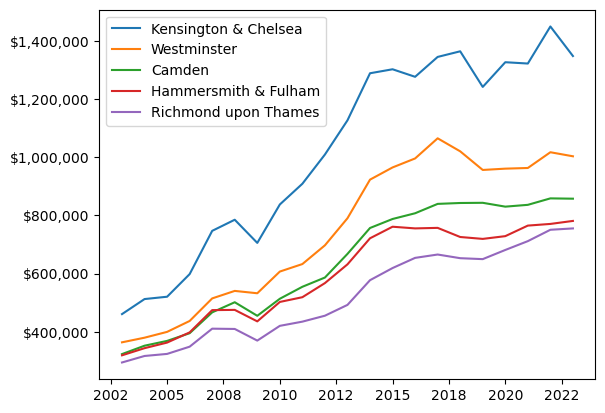

In [30]:
# format the axes and display line graph
ldf_plot = ldf_sub.plot()
ldf_plot.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ldf_plot.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))

Although this graph does little to answer the initial question, it's interesting to compare the boroughs with the highest absolute gain with each other to visualize their gains. 